[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mcwg/calc-python-labs/blob/main/Lab6-Optimization.ipynb)


# Lab 6: Optimization


---


Finding the largest and smallest values of a quantity often has practical importance. For example, constructing a car that uses the least amount of fuel, determining the level of production to maximize, calculating which wavelength carries the maximum radiation at a given temperature, and designing traffic patterns to minimize delays. Such problems belong to a field of mathematics called **optimization**.

In this lab, we use functions from the [SymPy library](https://www.sympy.org/en/index.html) to solve two optimization problems:

- identifying when the concentration of a drug reaches its maximum.
- finding the formula for the line that best fits a set of data points by minimizing the errors of the predictions.

# Learning Objectives

---

- Solving symbolic equations with `sympy.solve()`.
- Finding global minima and global maxima with the SymPy library.
- Using optimization to find the formula for the line that best fits a set of data points.

## Saving Your Work to a Colab Notebook

---

This lab is a shared Colab notebook available for anyone to view. However, since everyone is sharing this notebook, you do not have permission to save changes to this shared Colab notebook. In order to save your work:

1. You will need to set up a free Google Drive account. If you already have a Google Drive account, you are ready to go!
2. Click the `Copy to Drive` button to the right of the `+ Code` and `+ Text` buttons on top of the notebook.
3. Select from the menu `File/Save a Copy in Drive`.
  - By default, the notebook will be saved in a folder named **Colab Notebooks** in your Drive.
  - Feel free to rename and store the notebook wherever you like.


# Importing Required Libraries

---



In [ ]:
###################################
# Run to import required libraries
###################################
import numpy as np  # import numpy
import sympy as sym # import sympy
import pandas as pd  # import pandas
import matplotlib.pyplot as plt  # import matplotlib.pyplot

## How Often Do We Need to Import Libraries?

---

After importing a library for the first time, we can now access functions in the library in any code cell we run, regardless of where the code cell is located in the notebook. Thus, we only need to run `import` commands such as `import numpy as np` or `import pandas as pd` once, and then we can continue calling in functions from those libraries (using specified abbreviations) for as long as the session remains active. If you take a break while working in Colab, your session may *time out* and disconnect.

- We need to import libraries one time after opening a notebook or reconnecting after timing out.
- We do not need to import the library again unless we take a break and the connection times out.


<a name="q1"></a>
# Question 1

---

The concentration $C(t)$ of a drug, in ng/ml, in a patient's bloodstream $t$ hours after the drug is first administered is given by the function

$$C(t) = 12te^{-0.3t}.$$

Run the code cell below to plot the graph of $C$ and answer the questions that follow.

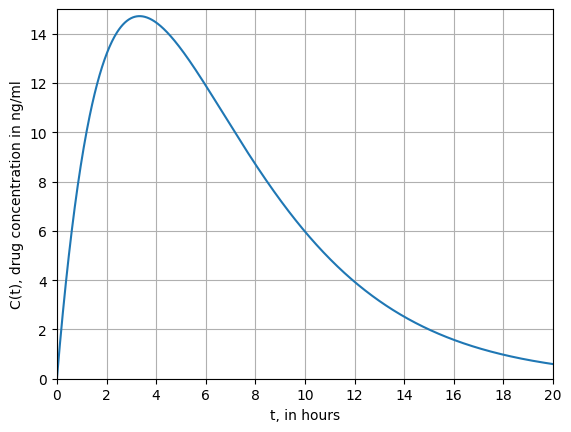

In [ ]:
###########################################################
# Run code cell to generate a plot.
# You do not need to edit any commands in this code cell.
###########################################################
t = np.linspace(0,20,1000)  # 1000 equally spaced values between t=0 and t=20
C = 12 * t * np.exp(-0.3 * t)  # corresponding values of C

###################################
# Plot curve through points (t, C)
###################################
plt.plot(t,  # input
         C)  # output

###############
# Plot options
###############
plt.xlabel('t, in hours')  # label on x-axis
plt.ylabel('C(t), drug concentration in ng/ml')  # label on y-axis
plt.xlim(0, 20)  # limits on horizontal (x) axis
plt.xticks(np.arange(0, 21, step=2))  # set tickmarks on horizontal (x) axis
plt.ylim(0, 15)  # limits on vertical (y) axis
plt.grid(True)  # show gridlines

# show the plot on the screen
plt.show()

<a name="q1a"></a>
## Question 1a

---

Complete the code cell below to define and store the function `C` as symbolic function of `t` using the SymPy library.

<br>  

*Hint: To enter a symbolic formula, we need to first [define a symbol for the input variable](https://docs.sympy.org/latest/tutorials/intro-tutorial/gotchas.html). Then you need to use the function [`sym.exp()`](https://docs.sympy.org/latest/modules/functions/elementary.html#exponential) when defining `C`.*


In [ ]:
##########################
# Solution to Question 1a
##########################
?? = sym.symbols('??')  # define symbol t as input variable
C = ??  # define symbolic function for C(t)
C  # display function to screen

<a name="q1b"></a>
## Question 1b

---

Complete the code cell below to calculate $C(6)$. Use the graph above to confirm the result. Then interpret the practical meaning of the value.

<br>  

*Hint: See [Lab 5](https://githubtocolab.com/mcwg/calc-python-labs/blob/main/Lab5-Symbolic-Differentiation-Marginal-Cost.ipynb) to review the syntax for the SymPy function [`evalf`](https://docs.sympy.org/latest/modules/evalf.html).*

In [ ]:
##########################
# Solution to Question 1b
##########################
??.evalf(subs={t: ??})  # evaluate C(t) at t=6

### Solution to Question 1b

---

Type an interpretation of the output from the previous code cell in the space below. Be sure to include units in your answer.




<br>  
<br>  


<a name="q1c"></a>
## Question 1c

---

Based on the graph above, at approximately what time(s) is the drug concentration in the bloodstream equal to 8 ng/ml?



### Solution to Question 1c

---

The drug concentration is approximately 8 ng/ml at $t =$ <mark>??</mark> and $t =$ <mark>??</mark>.


<br>  
<br>  



<a name="solve"></a>
# Solving Equations with SymPy

---

The SymPy  library has a `solve` function that finds all solutions to an equation of the form $f(x) = 0$. If we want to solve an equation whose right side is not equal to zero:

1. First bring all terms on the right side of the equation to the left side to obtain an equivalent equation whose right side now equal to zero.
2. Then enter the resulting expression on the left side of the equation (whose right side is equal to $0$) as the first input in the `solve` function.


Suppose we defined the $f(x) = x^2$ as a symbolic function `f = x**2`, and we would like to solve the equation $x^2 = 6$.

1. We substract $6$ from both sides to get the equivalent equation $x^2-6=0$.
2. Then we can enter the command `sym.solve(f - 6, x)` to find solution(s) to the equation $x^2 = 6$.

<br>  

Run the code cell below to verify $x^2=6$ has two solutions, $x= \pm \sqrt{6}$.


In [ ]:
x = sym.symbols('x')  # define variable x as a symbol
f = x**2  # define function f(x) = x^2
sym.solve(f - 6, x)  # solve equation f(x) = 6 (or f(x) - 6 = 0)

<a name="q2"></a>
# Question 2

---

The concentration $C(t)$ of a drug, in ng/ml, in a patient's bloodstream $t$ hours after the drug is first administered is given by the function

$$C(t) = 12te^{-0.3t}.$$

Complete the code cell below to find the time(s) when the drug concentration in the bloodstream is equal to 8 ng/ml. Then check the output of the code with your solution to [Question 1c](#q1c).

<br>  

*Caution: Be sure you have already answered defined `t` as a symbol and `C` as symbolic expression of the symbol `t` in [Question 1](#q1) before completing the code cell below.*

In [ ]:
#########################################################
# Solution to Question 2
# Be sure you have already defined t and C in Question 1
#########################################################
sym.solve(??, ??)  # Solve C(t) = 8 for t

<a name="q3"></a>
# Question 3

---

The concentration $C(t)$ of a drug, in ng/ml, in a patient's bloodstream $t$ hours after the drug is first administered is given by the function

$$C(t) = 12te^{-0.3t}.$$

<br>  

*Hint: See [Lab 5](https://githubtocolab.com/mcwg/calc-python-labs/blob/main/Lab5-Symbolic-Differentiation-Marginal-Cost.ipynb) for a review of differentiation with SymPy using the [`diff`](https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html) function.*

*Caution: Be sure you have already answered defined `t` as a symbol and `C` as symbolic expression of the symbol `t` in [Question 1](#q1) before answer the questions below.*



<a name="q3a"></a>
## Question 3a

---

Complete the code cell below to store the derivative $C'$ as a symbolic function named `C_prime`.



In [ ]:
#########################################################
# Solution to Question 3a
# Be sure you have already defined t and C in Question 1
#########################################################
C_prime = ??.diff(??)  # store derivative C'
C_prime  # display derivative to screen

<a name="q3b"></a>
## Question 3b

---

Complete the code cell below to verfiy $C'(6) \approx -1.587$. Then interpret the practical meaning of the value.

In [ ]:
##########################################################
# Solution to Question 3b
# Be sure you have already defined C_prime in Question 3a
##########################################################
??.evalf(subs={t: ??})  # evaluate C'(t) at t=6

### Solution to Question 3b

---

Type an interpretation of the output in the space below. Be sure to include units in your answer.




<br>  
<br>  


<a name="q3c"></a>
## Question 3c

---

Complete the code cell below to find the critical points of $C$. Check your answer with graph of $C$ plotted in [Question 1](#q1).

<br>

*Hint: A point $p$ in the domain of $C$ where $C'(p) =0$ or $C'(p)$ is undefined is called a critical point of the function $C$. Use the SymPy [`solve`](#solve) function to solve the equation $C'(t) = 0$ for $t$.*

In [ ]:
##########################################################
# Solution to Question 3c
# Be sure you have already defined C_prime in Question 3a
##########################################################
sym.solve(??, ??)  # find critical points of C

<a name="q3d"></a>
## Question 3d

---

Complete the code cell below to find the maximum concentration, $C$, in the bloodstream over the interval $0 \leq t \leq 20$. Compare your answer to the graph of $C$ in [Question 1](#q1).

In [ ]:
##########################################################
# Solution to Question 3d
# Be sure you have already defined C_prime in Question 3a
##########################################################
??.evalf(subs={t: ??})  # compute maximum concentration

-1.58686932692723

### Solution to Question 3d

---


The maximum drug concentration is <mark>??</mark> ng/ml, and it occurs <mark>??</mark> hours after the drug is initially administered.


<br>  
<br>  

# A Summary of Optimization with SymPy

---

To identify the largest and smallest value of a continuous function $f$ using functions from the SymPy library, perform the following steps:

1. Identify the **critical points** of $f$ which are values in the domain of $f$ where  $f'(p) = 0$ or $f'(p)$ is undefined.
  - Apply SymPy functions `diff` and `solve` to identify critical points.
2. Compute the **critical values** $f(p)$ at each critical point in the domain.
  - Use the SymPy function `evalf` to compute critical values.
3. Compare the critical values with the behavior of $f$ at endpoints, and identify the largest and smallest values (if they exist).
  - Plot the function or use the SymPy function `evalf` to identify the behavior of $f$ at the endpoints.

# Linear Regression: Finding the Line of Best Fit

---

Optimization is essential to data science. Data scientists use data to construct models. When the data is approximately linear, the process of fitting a line to a set of data is called **linear regression**, and the line of best fit is called the **regression line**.

Linear regression is an optimization problem. Let's explore how to apply the same optimization techniques from the drug concentration example to identify the linear model that best fits a set of data.



## Case Study: Relation Between Body and Brain Mass of Mammals

---

The brain mass of a mammal is approximately proportion to the overall body mass of the mammal. Larger mammal species tend to have larger brains than smaller species.  Consider the following three mammal species<sup>1</sup>:

- A jaguar has an average body mass of $100$ kg and brain mass of $157$ g.
- A gorilla has an average body mass of $207$ kg and brain mass of $406$ g.
- A horse has an average body mass of $521$ kg and brain mass of $655$ g.

We begin our analysis by first loading the three observed data points (jaguar, gorilla, and horse) into Python.

<br>  

*1. Weisberg, S. (1985) Applied Linear Regression. 2nd edition. Wiley, pp. 144-145.*



## Loading the Mammal Data

---

The Pandas dataframe named `sample` contains a sample of body masses (in kg) and brain masses (in g) from the sample of three mammals: jaguar, gorilla, and horse.

- The body masses for each of the three species are stored in the column named `obs_body`.
- The corresponding three brain masses are stored in the columnn named `obs_brain`.

Run the code cell below to load and display the Pandas dataframe `sample`.

In [ ]:
#############################
# Run code cell to load data
#############################
d = {'species': ['Jaguar', 'Gorilla', 'Horse'],  # species name
     'obs_body': [100.0, 207.0, 521.0],  # body mass in kg
     'obs_brain': [157.0, 406.0, 655.0]}  # brain mass in g

sample = pd.DataFrame(data=d)  # create dataframe
sample  # display dataframe

,species,obs_body,obs_brain
0,Jaguar,100.0,157.0
1,Gorilla,207.0,406.0
2,Horse,521.0,655.0


# Building a Model for the Data

---

Larger mammals typically have larger brains required to perform more complex tasks. Although the relationship between body mass and brain mass is not precisely linear, the relationship can be approximated using a linear model of the form

$$\boxed{\text{predict_brain} \approx m \cdot \text{obs_body}}.$$

The model has three ingredients:

- `obs_body` is observed body mass of a land mammal.
- `predict_brain` is the predicted brain mass of the land mammal with body mass `obs_body`.
- The coefficient `m` denotes the slope in the linear model used to predict brain mass.

We assume the vertical intercept is 0 since a mammal that has no body mass would have no brain mass. In order to find the value of $m$ that best fits the jaguar, gorilla, and horse data, we consider two important questions:

- **How can measure how well a model fits data?**
- **How can use calculus to identify the line that best fits the data?**

Run the code cell below to sketch one possible model ($m=1.5$)

$$\boxed{\text{predict_brain} \approx \color{tomato}{1.5} \cdot \text{obs_body}}.$$




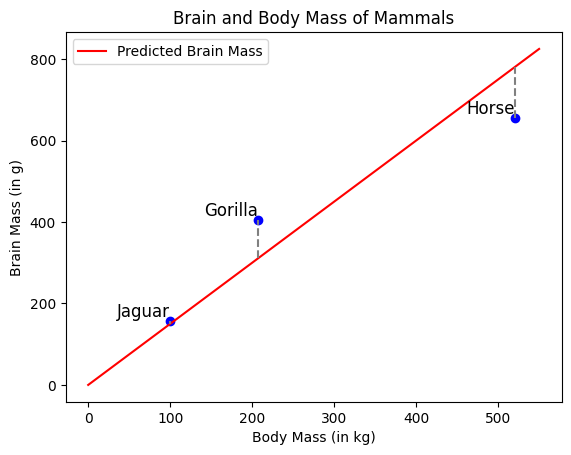

In [ ]:
###########################################################
# Run code cell to create a scatterplot.
# You do not need to edit any commands in this code cell.
###########################################################

######################################
# Store observed data to NumPy arrays
######################################
samp_species = sample['species'].to_numpy()
obs_body = sample['obs_body'].to_numpy()
obs_brain = sample['obs_brain'].to_numpy()

######################################
# Scatterplot of observed data points
######################################
plt.scatter(obs_body,  # predictor variable
            obs_brain,  # response variable
            color ='blue')  # set point color

################################
# One possible model with m=1.5
################################
slope_samp = 1.5
x = np.linspace(0,550,1000)
predict_samp = slope_samp * x

###########################
# Add line of best fit
###########################
plt.plot(x,  # predictor variable
         predict_samp,  # predicted value of response variable
         color='red',  # set color of line
         label='Predicted Brain Mass')  # label for line


for i in range(3):
  #######################
  # Add lines for errors
  #######################
  plt.vlines(x=obs_body[i],
             ymin=min(obs_brain[i], slope_samp * obs_body[i]),
             ymax=max(obs_brain[i], slope_samp * obs_body[i]),
             color='gray', linestyle='--')
  ################################
  # Add text label for each point
  ################################
  plt.text(obs_body[i], obs_brain[i],  # location of point
         samp_species[i],  # label for point
         color = 'black',  # color of text
         ha = 'right',  # horizontal alignment
         va = 'bottom',  # vertical alignment
         size = 'large')  # size of text

###############
# Plot options
###############
plt.title('Brain and Body Mass of Mammals')  # main plot label
plt.xlabel('Body Mass (in kg)')  # label on x-axis
plt.ylabel('Brain Mass (in g)')  # label on y-axis
plt.legend()  # add legend to plot
plt.show()  # show the plot on the screen

<a name="q4"></a>
# Question 4

---

Rank the predictions from most to least accurate. Explain how you determined your answer.

## Solution to Question 4

---

- The most accurate prediction is for the <mark>enter name of mammal</mark>.
- The second most accurate prediction is for the <mark>enter name of mammal</mark>.
- The least accurate prediction is for the <mark>enter name of mammal</mark>.


Briefly explain how you determined your rankings in the space below.




<br>  
<br>  

# Measuring the Fit of a Model

---

Using the linear model

$$\color{tomato}{\text{predict_brain} \approx m \cdot \text{obs_body}},$$

we calculate the **error** (also called the *residual*) of each predicted brain mass as the difference

$$\begin{align}
\text{error} &= (\color{tomato}{\text{predicted brain mass}}) - (\text{observed brain mass})\\
&= \big( \color{tomato}{m \cdot \text{obs_body}} \big) - \big( \text{obs_brain} \big)
\end{align}$$


- The magnitude of each error is the length of the vertical line from the observed data point to the line representing the predicted values.
  - If the predicted brain mass is less than the observed brain mass, the prediction is an **underestimate**, and the *error is negative*.
  - If the predicted brain mass is greater than the observed brain mass, the prediction is an **overestimate**, and the *error is positive*.
- Since we do not want positive errors and negative errors to cancel each other out, we compute the **sum the squares of the errors** (denoted **SSE**) to measure how well a model fits the observed data points.

For the three species (jaguar, gorilla, and horse) in our data, we have:

| `species` | `obs_body` |`predict_brain` | `obs_brain`| `error = predict_brain - obs_brain`| `sq_error = error**2` |
|---|---|---|---|--------------------------------|---|
|Jaguar| $100$ | $m \cdot 100$ | $157$ | $100m - 157$ | $(100m - 157)^2$ |
|Gorilla| $207$ | $m \cdot 207$ | $406$ | $207m - 406$ | $(207m - 406)^2$ |
|Horse| $521$ | $m \cdot 521$| $655$ | $521m - 655$  | $(521m - 655)^2$ |


- `obs_body` is the observed body mas (in kg).
- `predict_brain = m * obs_body` is the corresponding predicted brain mass (in g).
- `obs_brain` is the observed brain mass (in g).
- `error = predict_brain - obs_brain` is the error of the prediction..
- `sq_error = error**2` is the error squared.

Summing together the square of the errors (in the last column of the table), we obtain a general formula for the SSE as a function of the slope `m` in our linear model:

$$\boxed{\text{SSE}(m) = (100m - 157)^2 + (207m - 406)^2 + (521m - 655)^2}.$$


Notice the SSE depends on the value chosen for the slope, $m$.

- The observed data stored in `obs_body` and `obs_brain` are fixed values in the formula for the SSE.
- The slope `m` is the only undetermined variable in the formula for the SSE.
- Thus, we consider the SSE as function of the slope, `m`.

One of the most common methods for identifying the line of best fit is to find the value of the slope, `m`, that *minimizes the SSE*.





<a name="q5"></a>
# Question 5

---

Consider two possible models with slopes $\color{\tomato}{m_1=1.5}$ and $\color{\green}{m_2=1.25}$:

$$\color{\tomato}{\text{predict_brain} = 1.5 \cdot \text{obs_body}} \qquad \text{and} \qquad
 \color{green}{\text{predict_brain} = 1.25 \cdot \text{obs_body}}.$$

Which of the models better fits the jaguar, gorilla, and horse data stored in `sample`?



<a name="q5a"></a>
## Question 5a

---

Run the code cell below to generate a plot to graphically compare the two models. Based on the plot, which model do you think better fits the data?

<br>  

*You do not need to edit the code cell below. Just run the code cell and answer the question based on the plot.*

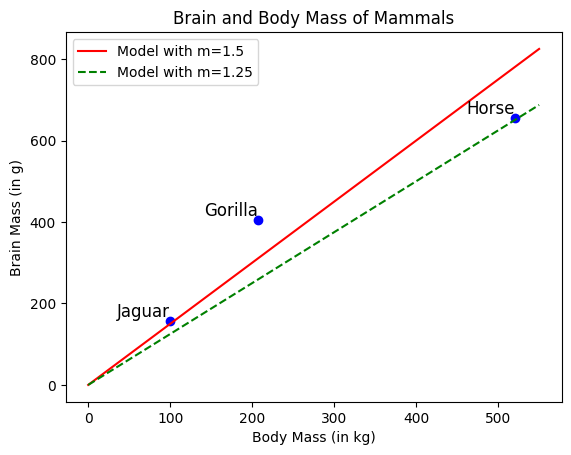

In [ ]:
###########################################################
# Run code cell to create a plot to compare models.
# You do not need to edit any commands in this code cell.
###########################################################

######################################
# Store observed data to NumPy arrays
######################################
samp_species = sample['species'].to_numpy()
obs_body = sample['obs_body'].to_numpy()
obs_brain = sample['obs_brain'].to_numpy()

######################################
# Scatterplot of observed data points
######################################
plt.scatter(obs_body,  # predictor variable
            obs_brain,  # response variable
            color ='blue')  # set point color

######################
# Two possible models
######################
x = np.linspace(0,550,1000)  # x-values used to make predictions
slope_1 = 1.5  # slope of model 1
predict_1 = slope_1 * x  # predicted values for model 1
slope_2 = 1.25  # slope of model 2
predict_2 = slope_2 * x  # predicted values for model 2

########################
# Add two linear models
########################
plt.plot(x,  # predictor variable
         predict_1,  # predicted value of response variable
         color='red',  # set color of line
         label='Model with m=1.5')  # label for line

plt.plot(x,  # predictor variable
         predict_2,  # predicted value of response variable
         color='green',  # set color of line
         linestyle='--',  # dashed line style
         label='Model with m=1.25')  # label for line


################################
# Add text label for each point
################################
for i in range(3):
  plt.text(obs_body[i], obs_brain[i],  # location of point
         samp_species[i],  # label for jaguar
         color = 'black',  # color of text
         ha = 'right',  # horizontal alignment
         va = 'bottom',  # vertical alignment
         size = 'large')  # size of text

###############
# Plot options
###############
plt.title('Brain and Body Mass of Mammals')  # main plot label
plt.xlabel('Body Mass (in kg)')  # label on x-axis
plt.ylabel('Brain Mass (in g)')  # label on y-axis
plt.legend()  # add legend to plot
plt.show()  # show the plot on the screen

### Solution to Question 5a

---

Based on the plot above, which model do you believe better fits the three observed data points? Support your answer with a brief explanation of how you determined your answer in the space below.




<br>  
<br>  

<a name="q5b"></a>
## Question 5b

---

Using the formula we derived for the SSE,

$$\text{SSE}(m) = (100m - 157)^2 + (207m - 406)^2 + (521m - 655)^2,$$

complete the code cells below to compute and compare the SSE for the model with $m=1.5$ and the model with $m=1.25$. Based on the output, which of the two models better fits the data?



In [ ]:
###########################################
# Solution to Question 5b
# Create a symbolic function for the SSE
# as a function of the symbolic variable m
###########################################
m = sym.symbols('m')  # define slope m as a symbolic variable
SSE =   # sum of the squares of the errors
SSE  # print SSE to screen

In [ ]:
#####################################################
# Complete the code cell to compute SSE when m = 1.5
#####################################################
SSE_1 = ??.evalf(subs={m: ??})  # sum of the squares of the errors if m=1.5
SSE_1  # print SSE to screen

In [ ]:
######################################################
# Complete the code cell to compute SSE when m = 1.25
######################################################
SSE_2 = ??.evalf(subs={m: ??})  # sum of the squares of the errors if m=1.25
SSE_2  # print SSE to screen

### Solution to Question 5b

---

Interpret the output of the previous code cells.

- The SSE for the model with $\color{tomato}{m_1=1.5}$ is <mark>??</mark>.
- The SSE for the model with $\color{green}{m_2=1.25}$ is <mark>??</mark>.
- The model with slope $m=$  <mark>??</mark> is a better fit.


<br>  
<br>  



<a name="q6"></a>
# Question 6

---

The line of best fit (or regression line) is the slope $m$ in the model

$$\text{predict_brain} = m \cdot \text{obs_body}$$

that **mimimizes the sum of the squares of the errors (SSE)**. In [Question 5](#q5) we compared only two models ($m_1=1.5$ and $m_2=1.25$) out of the infinitely many possible models we can consider. Answer the questions below to identify the slope $m$ (out of all possible slopes) that minimizes the SSE and best fits the three data points (jaguar, gorilla, and horse).



<a name="q6a"></a>
## Question 6a

---

In [Question 5b](#q5b) we stored the formula for the sum of the squares of the errors,

$$\text{SSE}(m) = (100m - 157)^2 + (207m - 406)^2 + (521m - 655)^2,$$

as a symbolic function named `SSE`.

- The slope $m$ in the linear model is the variable in the formula for the `SSE`.
- The SSE is a quadratic function $m$.

The SymPy library has a [`simplify`](https://docs.sympy.org/latest/modules/simplify/simplify.html) function that simplifies exressions by distributing and combining like terms. Run the code cell below to store the `SSE` as a simplified expression of the form

$$\text{SSE}(m) = am^2 + bm + c.$$

where $a$, $b$, and $c$ denote constants and $m$ is a symbolic variable in the formula.





In [ ]:
############################################################
# Run code cell to find a simplified expression for the SSE
# Be sure you have already defined SSE in Question 5b
############################################################
SSE = SSE.simplify()  # simplify expression
SSE  # print SSE to screen

324290*m**2 - 881994*m + 618510

### Solution to Question 6a

---

Type the values of the constants $a$, $b$, and $c$ in the quadratic formula below.

$$\text{SSE}(m) = ?? \ m^2 - ?? m + ??$$


<br>  
<br>  

<a name="q6b"></a>
## Question 6b

---

Based on the simplified formula for the `SSE` in [Question 6a](#q6a), use calculus to find the value of $m$ that minimizes the `SSE`.




### Solution to Question Part b

---

Show your work by replacing each ?? with an appropriate value.



$$\text{SSE}'(m) = ?? \ m - ??$$

The value of $m$ that minimizes the sum of the squares of the errors is therefore

$$m = \frac{??}{??}.$$


<br>  
<br>  



<a name="q6c"></a>
## Question 6c

---

Check your answer to [Question 6b](#q6b) by completing the commands in the code cell below.




In [ ]:
#####################################################################
# Solution to Question 6c
# Complete the code cell find the value of m that minimizes the SSE.
#####################################################################
SSE_prime = ??  # find derivative of SSE
m_best = ??  # find critical points

##############################################################
# Do not edit the command below.
# The output displayed is the slope m that minimizes the SSE.
##############################################################
round(m_best[0], 4)

### Solution to Question 6c

---

Enter a formula for the line that best fits the three data points for the jaguar, gorilla, and horse. Round the slope to four decimal places.

$$\text{predict_brain} = ?? \cdot \text{obs_body}$$

<br>  
<br>  

<a name="q6d"></a>
## Question 6d

---

Complete the code cell below to calculate the SSE for the model using the slope of the line of best fit identified in Questions [6b](#q6b) and [6c](#q6c). Verify that the resulting SSE is less than the SSEs for $m=1.5$ and $m=1.25$ computed in [Question 5b](#q5b).


In [ ]:
#########################################
# Solution to Question 6d
# Complete the code cell to compute SSE.
#########################################
??.evalf(subs={m: ??})

### Solution to Question 6d

---

Interpret the output of the previous code cell.

- The line of best fit has SSE equal to <mark>??</mark>.



<br>  
<br>  



# Visually Comparing Models

---


Run the code cell below to compare the fit of models with slopes $\color{tomato}{m_1 = 1.5}$ and $\color{green}{m_2 = 1.25}$ with the line of best fit identified in [Question 6](#q6). If the line of best fit does not seem to fit the data best, check your work in Questions [4](#q4) and [5](#q5).


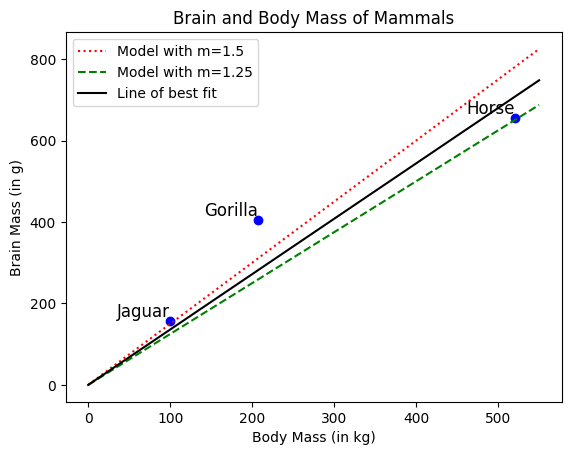

In [ ]:
###########################################################
# Run code cell to create a plot to compare models.
# You do not need to edit any commands in this code cell.
###########################################################

######################################
# Store observed data to NumPy arrays
######################################
samp_species = sample['species'].to_numpy()
obs_body = sample['obs_body'].to_numpy()
obs_brain = sample['obs_brain'].to_numpy()

######################################
# Scatterplot of observed data points
######################################
plt.scatter(obs_body,  # predictor variable
            obs_brain,  # response variable
            color ='blue')  # set point color

########################
# Three possible models
########################
x = np.linspace(0,550,1000)  # x-values used to make predictions
slope_1 = 1.5  # slope of model 1
predict_1 = slope_1 * x  # predicted values for model 1
slope_2 = 1.25  # slope of model 2
predict_2 = slope_2 * x  # predicted values for model 2
slope_1 = m_best[0]  # slope of line of best fit
predict_3 = slope_1 * x  # predicted values for line of best fit

####################
# Add linear models
####################
plt.plot(x,  # predictor variable
         predict_1,  # predicted value of response variable
         color='red',  # set color of line
         linestyle=':',  # dashed line style
         label='Model with m=1.5')  # label for line

plt.plot(x,  # predictor variable
         predict_2,  # predicted value of response variable
         color='green',  # set color of line
         linestyle='--',  # dashed line style
         label='Model with m=1.25')  # label for line

plt.plot(x,  # predictor variable
         predict_3,  # predicted value of response variable
         color='black',  # set color of line
         label='Line of best fit')  # label for line


################################
# Add text label for each point
################################
for i in range(3):
  plt.text(obs_body[i], obs_brain[i],  # location of point
         samp_species[i],  # label for point
         color = 'black',  # color of text
         ha = 'right',  # horizontal alignment
         va = 'bottom',  # vertical alignment
         size = 'large')  # size of text

###############
# Plot options
###############
plt.title('Brain and Body Mass of Mammals')  # main plot label
plt.xlabel('Body Mass (in kg)')  # label on x-axis
plt.ylabel('Brain Mass (in g)')  # label on y-axis
plt.legend()  # add legend to plot
plt.show()  # show the plot on the screen

<a name="save-before"></a>
# Be Sure You Have Saved Your Work!
---

This lab is a shared Colab notebook available for anyone to view. However, since everyone is sharing this notebook, you do not have permission to save changes to this shared Colab notebook. In order to save your work:

1. You will need to set up a free Google Drive account. If you already have a Google Drive account, you are ready to go!
2. Click the `Copy to Drive` button to the right of the `+ Code` and `+ Text` buttons on top of the notebook.
3. Select from the menu `File/Save a Copy in Drive`.
  - By default, the notebook will be saved in a folder named **Colab Notebooks** in your Drive.
  - Feel free to rename and store the notebook wherever you like.


# Code Summary

---




## Solving Equations Symbolically

---

In [ ]:
# load libraries and define function for this cell to run
import sympy as sym
x = sym.symbols('x')
f = x**2

# To solve f(x) = 16 we need to rewrite as f(x) - 16 = 0 and use sym.fsolve
sym.solve(f - 16, x)  # find values of x which make f - 16 equal to zero


## Symbolic Optimization

---

To identify the largest and smallest value of a contiuous function $f$ using functions from the SymPy library, perform the following steps:

1. Identify the **critical points** of $f$ which are values of in the domain of $f$ where  $f'(p) = 0$ or $f'(p)$ is undefined.
  - Apply SymPy functions `diff` and `solve` to identify critical points.
2. Compute the **critical values** $f(p)$ at each critical point in the domain.
  - Use the SymPy function `evalf` to compute critical values.
3. Compare the critical values with behavior of $f$ at endpoints and identify the largest and smallest values (if they exist).
  - Plot the function or use the SymPy function `evalf` to identify the behavior of $f$ at the endpoints.

Example: Find the largest and smallest value of $C(t)=-x^{3}+9x^{2}+48x-52$ on $0\leq t\leq 14$

In [ ]:
# load libraries and define function for this cell to run
import sympy as sym
t = sym.symbols('t')  # define symbol t as input variable
C = -t**3 + 9 * t**2 + 48 * t - 52  # define symbolic function for C(t)

####################################
# Identify critical points of C(t)
###################################
C_prime = C.diff(t)  # find derivative of C
t_zero_derivative = sym.solve(C_prime,t) # find points where C_prime is zero
print("C'(t) = 0 at t = ", t_zero_derivative)  # print the array with all critical points

# In this case C'(t) is defined everywhere, so there are two critical points where C'(t)=0
# The two ctritical points are at t=-2 and t=8. Only t=8 is in the interval 0 <= t <= 14
# Its value is in the 2st entry of the t_zero_derivative array, so t_zero_derivative[0]

# These are the critical points and the endpoints
critical_pt = 8
left_endpoint = 0
right_endpoint = 14

##############################################################
# Compute critical values of C(t) and values at the endpoints
##############################################################
print("Value of C(t) at critical point t =", critical_pt,": ", C.evalf(subs={t: critical_pt}))
print("Value of C(t) at left endpoint: ", C.evalf(subs={t: left_endpoint}))
print("Value of C(t) at right endpoint: ", C.evalf(subs={t: right_endpoint}))

####################
# Print conclusion
####################
print("\nCONCLUSION:")
print("Largest value of C(t): ", C.evalf(subs={t: critical_pt}),"at t =",critical_pt)
print("Smallest value of C(t): ", C.evalf(subs={t: right_endpoint}),"at t =",left_endpoint)

###############################
# plot displaying the solution
###############################
import numpy as np
import matplotlib.pyplot as plt
critical_value = C.evalf(subs={t: critical_pt})
t = np.linspace(0,15,100)  # 1000 equally spaced values between t=0 and t=20
C = -t**3+9*t**2+48*t-52  # corresponding values of C
plt.plot(t, C)  # (input, output)
plt.vlines(x=critical_pt, ymin=0, ymax=critical_value, color='red', linestyle='dashed', linewidth=3)
plt.xlabel('t')  # label on x-axis
plt.ylabel('C(t)')  # label on y-axis
plt.xlim(0, 15)  # limits on horizontal (x) axis
plt.axhline(y=0, color='black') # add a horizontal axis at y=0
plt.axvline(x=0, color='black') # add a vertical axis at x=0
plt.ylim(-200, 500)  # limits on vertical (y) axis
plt.grid(True)  # show gridlines

# show the plot on the screen
plt.show()

## Algebra with Symbolic Functions

---

In [ ]:
# define the expression
import sympy as sym
x = sym.symbols('x')
y = 4 * (x + 2)**2 - 7 * (x - 32)**2

# simplify y
y.simplify()

Sometimes `simplify` does not simplify as expected. There are more functions, like `expand()`, `factor()`, etc.

In [ ]:
# define the expression
import sympy as sym
x = sym.symbols('x')
y = (x + 2)**3 + 4 * (x + 2)**5

#########################################################
# Uncomment several options below to see their effect
#########################################################
y.expand()
# y.simplify()
# y.factor()